In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("cars_sales_ohe.csv")

In [5]:
df.head()

,Audi,BMW,Ford,Hyundi,Mercedes-Benz,Skoda,Toyota,Vauxhall,Volkswagen,1 Series,...,Manual,Semi-Auto,year,Diesel,Electric,Hybrid,Petrol,engineSize,mileage,price
0,0,0,0,0,0,0,1,0,0,0,...,1,0,2016,0,0,0,1,2.0,24089,16000
1,0,0,0,0,0,0,1,0,0,0,...,1,0,2017,0,0,0,1,2.0,18615,15995
2,0,0,0,0,0,0,1,0,0,0,...,1,0,2015,0,0,0,1,2.0,27469,13998
3,0,0,0,0,0,0,1,0,0,0,...,1,0,2017,0,0,0,1,2.0,14736,18998
4,0,0,0,0,0,0,1,0,0,0,...,1,0,2017,0,0,0,1,2.0,36284,17498


In [6]:
x = df.drop(columns=['price'])
y = df.price

In [36]:
x.head()

,Audi,BMW,Ford,Hyundi,Mercedes-Benz,Skoda,Toyota,Vauxhall,Volkswagen,1 Series,...,Automatic,Manual,Semi-Auto,year,Diesel,Electric,Hybrid,Petrol,engineSize,mileage
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2016,0,0,0,1,2.0,24089
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2017,0,0,0,1,2.0,18615
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2015,0,0,0,1,2.0,27469
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2017,0,0,0,1,2.0,14736
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,2017,0,0,0,1,2.0,36284


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [38]:
x_train,y_train=np.asarray(x_train),np.asarray(y_train)
x_test,y_test=np.asarray(x_test),np.asarray(y_test)

In [39]:
x_train.shape,x_test.shape

((69185, 175), (17297, 175))

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

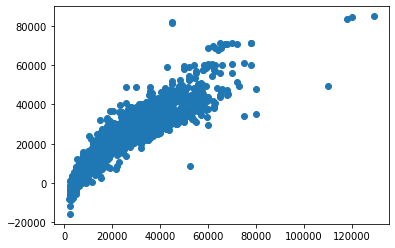

In [42]:
pred=lr.predict(x_test)
plt.scatter(y_test,pred)

In [43]:
lr_diff=pd.DataFrame({'Atual value':y_test,'predicted value':pred})
lr_diff.head()

,Atual value,predicted value
0,18295,19700.907080
1,20999,17157.708315
2,11995,11342.992563
3,18998,23542.195513
4,5298,2079.810877


In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_abs_err=mean_absolute_error(y_test,pred)
mean_squre_err=mean_squared_error(y_test,pred)
root_mean_square_err=np.sqrt(mean_squared_error(y_test,pred))
print("Mean Abs error : ",mean_abs_err)
print("Mean Square error : ",mean_squre_err)
print("Root Mean Square error : ",root_mean_square_err)

Mean Abs error :  2025.7398846837946
Mean Square error :  9948705.541432243
Root Mean Square error :  3154.15686696655


In [45]:
from sklearn.model_selection import cross_val_score

In [49]:
cv = cross_val_score(lr,x_test,y_test,cv = 10,n_jobs = -1)
cv

array([ 8.76415706e-01,  8.80212731e-01,  8.61650335e-01,  8.80221033e-01,
        8.42598386e-01,  8.83391509e-01, -1.42360238e+07, -7.93821598e+03,
        8.77460580e-01,  8.69352767e-01])

In [50]:
cv.mean()

-1424395.4998285957

In [51]:
sns.set_style(style = "whitegrid")

In [52]:
def main():
    
    fig = plt.subplots(1,1,figsize = (20,8))
    plt.scatter(y_test,pred,marker = "+",c= "#adff2f",alpha = 0.4,label = "Predictions")
    plt.plot(y_test,y_test,c = "#4000ff",lw = 5,label = "True Values")
    plt.legend()

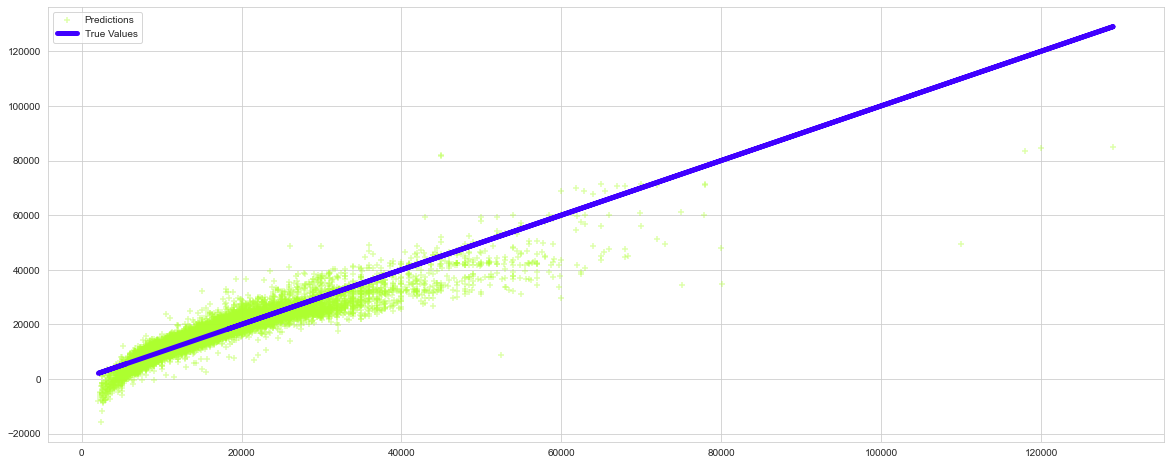

In [53]:
_ = main()